# Esperança e média amostral

É muito importante distinguir esperança e variância, que são propriedades de distribuições de probabilidade, de médias e variâncias calculadas de amostras.

Para entender isso, vamos criar um modelo de distribuição de probabilidades para o número de fêmeas em ninhadas do Sagui *Callithrix jacchus*. As premissas de nosso modelo são:

1. Cada ninhada tem 2 filhotes;
2. Mesma chance de cada filhote ser macho ou fêmea;
3. Atribuição de sexo de cada filhote é independente dos demais.

Portanto, o espaço amostral de nossa variável discreta "número de fêmeas na ninhada" ($X$) é:

$S \, = \, \{0, \,1, \, 2\}$

E a distribuição de probabilidades  é a função $f(x)$, que associa um valor de probabilidade a cada um dos valores do conjunto $S$:

$f(0) = P(X=0) = \frac{1}{4}$

$f(1) = P(X=1) = \frac{1}{2}$

$f(2) = P(X=2) = \frac{1}{4} $
      
## Esperança da distribuição
A esperança de uma distribuição de probabilidades discreta, como nosso modelo, é:

$$
        E{X} = \sum_{x\in S} x\, f(x)
        \, = \,  \sum_{x\in S} x\, P(X=x) 
$$

Vamos calculá-la usando o R. Primeiro criamos um objeto com o espaço amostral da distribuição (ou seja, todos os valores possíveis para a variávei $X$):

In [41]:
## Espaco amostral: numero possivel de fêmeas, em ninhadas de 2 filhotes
S <- c(0, 1, 2)

Em seguida criamos um objeto com as probabilidades associadas com  cada valor do espaço amostral, de acordo com nosso modelo:

In [42]:
pS <- c(0.25, 0.5, 0.25)

Obtemos a esperança da distribuição multiplicando cada valor do espaço amostral pela probabilidade atribuída a ele, e em seguida somamos todos estes valores:

In [43]:
## Multiplica cada elemento por sua probabilidade
SxpS <- S * pS
## Esperança:
(Esp <- sum( SxpS))

[1] 1

Ou seja, o valor esperado desta distribuição é de uma fêmea por ninhada.

## Média amostral
Embora possamos chamar a esperança de uma distribuição de média, ela não é o mesmo que a média que calculamos de uma amostra. Vamos exemplificar isso simulando amostras tomadas de nossa distribuição. Começamos simulando uma amostra de dez ninhadas. 

In [44]:
## Uma amostra de dez ninhadas, que seguem nossa distribuição
(amostra1 <- sample( x = S, size = 10, replace = TRUE, prob = pS))

[1] 0 2 1 0 0 1 0 2 0 2

E calculamos a média desta amostra:

In [45]:
## Media amostral
mean(amostra1)

[1] 0.8

O valor da média amostral não necessariamente corresponde ao valor teórico da esperança. Mais do que isso, a média amostral varia a cada amostragem. Você pode verificar isso repetindo os comandos acima. Portanto, a média amostral **é uma variável aleatória**.

Ainda assim, a média amostral é um **estimador** da média da distribuição que gera os dados. Sob certas condiçẽos (como uma amostragem aleatória do processo que gera os dados), esse estimador terá, em média, o valor da esperança. 

Vamos verificar isso simulando mil amostras de dez ninhadas cada uma. Calculamos a média de cada uma destas amostras, e vamos inspecionar a distribuição destes valores com um histograma:


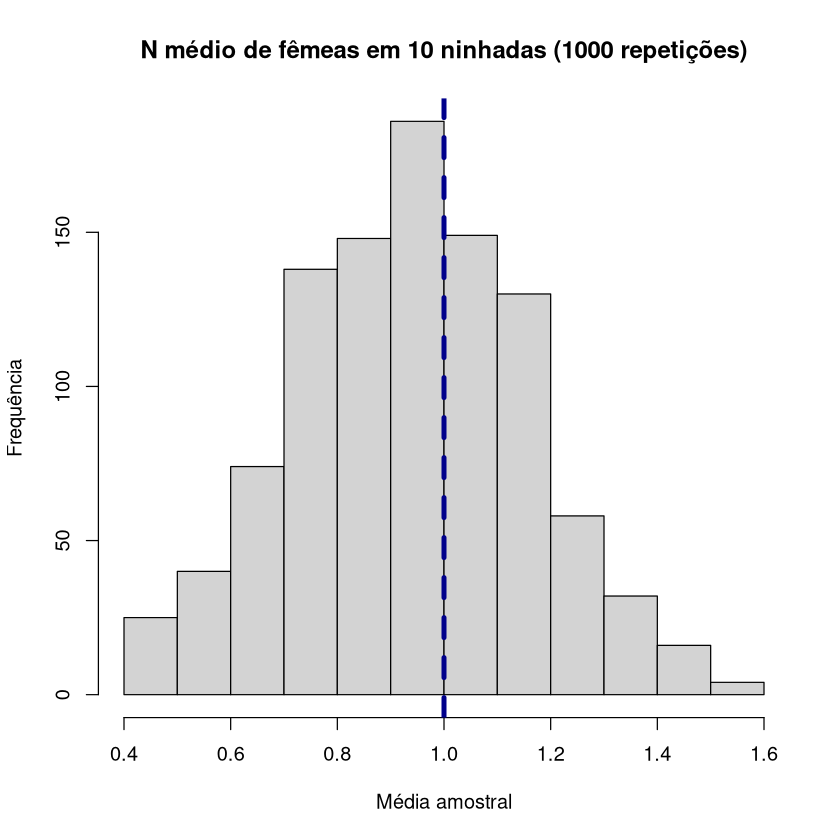

In [46]:
medias <- c() # cria vetor vazio
## Loop que simula as amostras e calcula suas medias
for(i in 1:1000){
    ## Simula a amostra
    amostra <- sample( x = S, size = 10, replace = TRUE, prob = pS)
    ## Calcula a media amostral e guarda na i-esima posicao do vetor de resultados
    medias[i] <- mean(amostra)
}

## Histograma das 1000 medias
hist(medias,
     xlab = "Média amostral", ylab = "Frequência",
     main = "N médio de fêmeas em 10 ninhadas (1000 repetições)")
## Adiciona o valor da Esperanca da distribuicao
abline(v = Esp, lty =2, col = "darkblue", lwd=4)

O histograma mostra que neste conjunto de mil médias amostrais valores mais próximos da esperança teórica foram mais frequentes. De fato, a média dessas médias está bem próxima da esperança teórica, indicado no histograma pela linha vertical azul. 

Podemos também calcular  a média das mil médias amostrais com:

In [47]:
mean(medias)

[1] 0.9883

## Em resumo

- Esperança e variância são propriedades de distribuições de probabilidades. Uma vez definida uma distribuição, essas propriedades não mudam;
- Médias e variâncias amostrais são variáveis aleatórias, cujos valores variam a cada amostragem;
- A média da distribuição das médias e variâncias amostrais podem ser usadas para estimar a esperança e a variância do processo probabilístico que gera os dados.